In [14]:
import pandas as pd

In [15]:
df=pd.read_csv('asylum_seekers_filtered.csv')
df

,Destination,Origin,Rejected
0,Australia,Afghanistan,96
1,Australia,Afghanistan,20
2,Australia,Angola,0
3,Australia,Albania,*
4,Australia,Albania,15
...,...,...,...
3465,United Kingdom,Zambia,6
3466,United Kingdom,Zambia,22
3467,United Kingdom,Zimbabwe,135
3468,United Kingdom,Zimbabwe,0


In [23]:

df['Rejected'] = pd.to_numeric(df['Rejected'], errors='coerce')

df = df.dropna(subset=['Rejected'])

grouped_data = df.groupby(['Origin', 'Destination'])['Rejected'].sum().reset_index()

pivot_table = grouped_data.pivot_table(values='Rejected', index='Origin', columns='Destination', fill_value=0)

correlation_matrix = pivot_table.T.corr()

print(correlation_matrix)

correlation_matrix.to_csv('file')





Origin                      Afghanistan   Albania   Algeria  American Samoa  \
Origin                                                                        
Afghanistan                    1.000000  0.978849  0.793403             NaN   
Albania                        0.978849  1.000000  0.867716             NaN   
Algeria                        0.793403  0.867716  1.000000             NaN   
American Samoa                      NaN       NaN       NaN             NaN   
Andorra                             NaN       NaN       NaN             NaN   
...                                 ...       ...       ...             ...   
Wallis and Futuna Islands           NaN       NaN       NaN             NaN   
Western Sahara                -0.055127  0.055615  0.534821             NaN   
Yemen                          0.042798 -0.073510 -0.096466             NaN   
Zambia                        -0.110346 -0.106047 -0.148032             NaN   
Zimbabwe                      -0.090893 -0.083609 -0

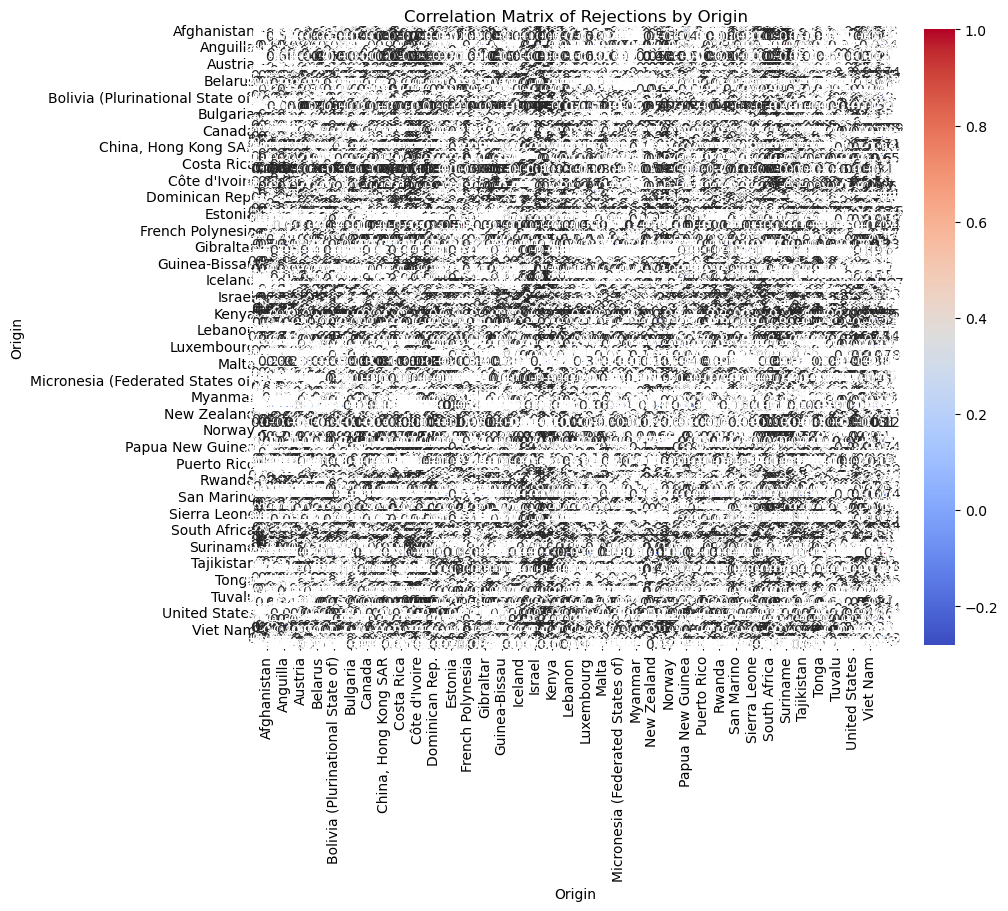

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Rejections by Origin')
plt.show()